In [1]:
import cv2
from cvzone.HandTrackingModule import HandDetector
import numpy as np
import math
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import imghdr



C:\Users\Omar_\AppData\Local\Temp\ipykernel_19576\2467295143.py:10: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
# Initialize camera
cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)
offset = 20
imgSize = 300
labels = ['A', 'B', 'C', 'D', 'E', 'F']


In [3]:
data_dir = 'Data' 

In [4]:
image_exts = ['jpeg','jpg', 'png']

In [5]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        ex = imghdr.what(image_path)
        # size = os.stat(image_path).st_size
        if ex in image_exts: 
            print(f'{image_path} is a valid image')
        else: 
            os.remove(image_path)
            print(f'{image_path} is not a valid image and has been removed')

Data\A\Image_1728055689.753647.jpg is a valid image
Data\A\Image_1728055690.278701.jpg is a valid image
Data\A\Image_1728055690.3419573.jpg is a valid image
Data\A\Image_1728055690.4236362.jpg is a valid image
Data\A\Image_1728055690.4446783.jpg is a valid image
Data\A\Image_1728055690.4854476.jpg is a valid image
Data\A\Image_1728055690.5057733.jpg is a valid image
Data\A\Image_1728055690.5483458.jpg is a valid image
Data\A\Image_1728055690.5673447.jpg is a valid image
Data\A\Image_1728055690.6225493.jpg is a valid image
Data\A\Image_1728055690.6447139.jpg is a valid image
Data\A\Image_1728055690.6793008.jpg is a valid image
Data\A\Image_1728055690.699261.jpg is a valid image
Data\A\Image_1728055690.7397568.jpg is a valid image
Data\A\Image_1728055690.756882.jpg is a valid image
Data\A\Image_1728055690.8254488.jpg is a valid image
Data\A\Image_1728055690.8870978.jpg is a valid image
Data\A\Image_1728055690.9061043.jpg is a valid image
Data\A\Image_1728055690.9526603.jpg is a valid ima

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1762 files belonging to 6 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()
batch

(array([[[[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         ...,
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],
 
         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.

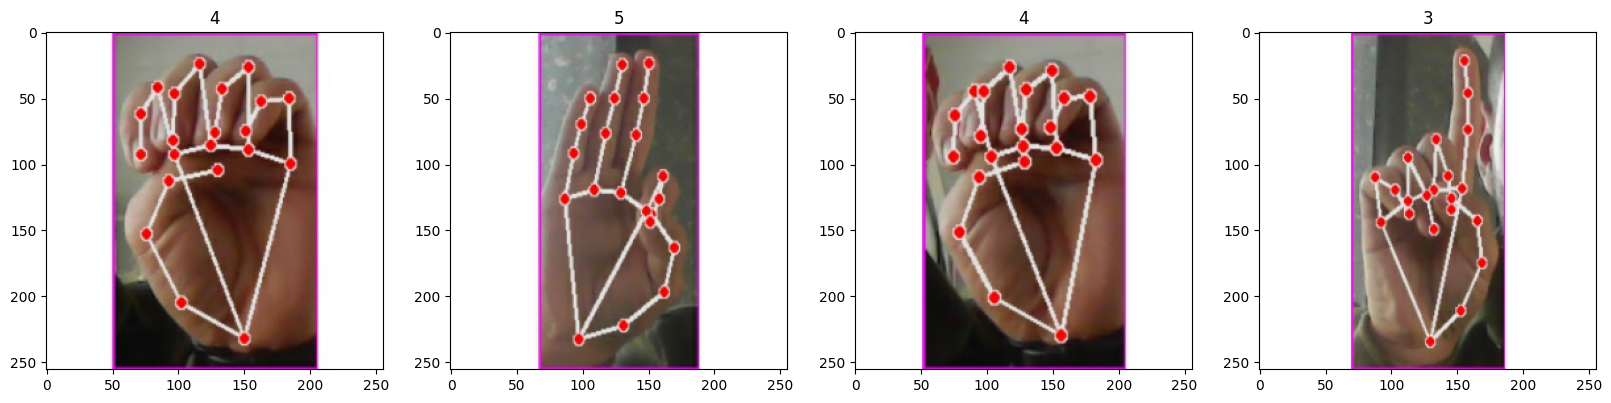

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [11]:
data = data.map(lambda x,y: (x/255, y))

In [12]:
data.as_numpy_iterator().next()

(array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.0000

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [14]:
train_size, test_size, val_size

(39, 5, 11)

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),


    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),


    Flatten(),
    
    Dense(128, activation='relu'),
    
    Dropout(0.5),
    
    Dense(len(labels), activation='softmax')
])

d:\AI\AI\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,750 (56.61 MB)

 Trainable params: 14,839,750 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
logdir='logs'

In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [21]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 508ms/step - accuracy: 0.5074 - loss: 1.8035 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 514ms/step - accuracy: 0.9981 - loss: 0.0093 - val_accuracy: 1.0000 - val_loss: 3.3206e-04
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 510ms/step - accuracy: 0.9899 - loss: 0.0205 - val_accuracy: 1.0000 - val_loss: 6.3212e-06
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 516ms/step - accuracy: 0.9975 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 7.4126e-04
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 547ms/step - accuracy: 0.9997 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 2.0489e-07
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 525ms/step - accuracy: 0.9981 - loss: 0.0108 - val_accuracy: 1.0000 - val_loss: 1.9958e-05
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 22s 550ms/step - accuracy: 0.9954 - loss: 0.0152 - val_accuracy: 1.0000 - val_loss: 7.6884e-06
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 22s 549ms/step - accuracy: 1.0000 -

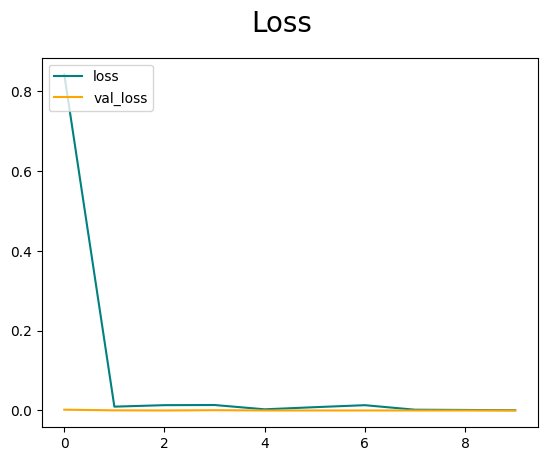

In [22]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

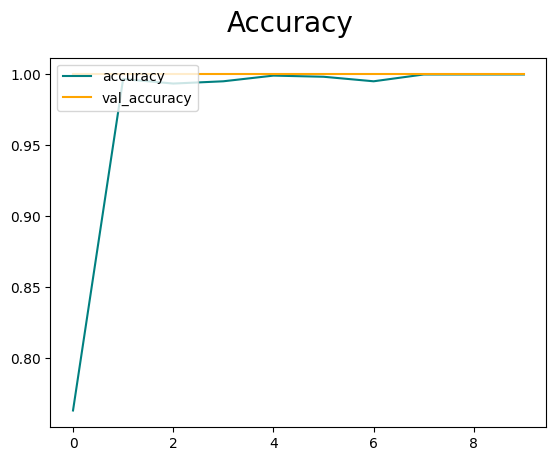

In [23]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [24]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [25]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [26]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    yhat = tf.argmax(yhat, axis=1)

    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


In [27]:
prev_time = 0  

In [28]:
import cv2
import numpy as np
import time
import math

cap = cv2.VideoCapture(0)
prev_time = 0
imgSize = 256
offset = 20  

while True:
    success, img = cap.read()
    img = cv2.flip(img, 1) 
    imgOutput = img.copy()
    
    hands, img = detector.findHands(img)  
    
    if hands:
        hand = hands[0]
        x, y, w, h = hand['bbox']

        y1, y2 = max(0, y - offset), min(img.shape[0], y + h + offset)
        x1, x2 = max(0, x - offset), min(img.shape[1], x + w + offset)
        imgCrop = img[y1:y2, x1:x2]

        if imgCrop.shape[0] > 0 and imgCrop.shape[1] > 0:
            imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255 

            ratio = h / w 
            
            if ratio > 1:
                new_w = math.ceil(imgSize * (w / h))
                imgResize = cv2.resize(imgCrop, (new_w, imgSize))
                wGap = max(0, (imgSize - new_w) // 2)

                if wGap + imgResize.shape[1] > imgSize:
                    imgWhite[:, wGap:wGap + imgSize, :] = imgResize[:, :imgSize - wGap, :]
                else:
                    imgWhite[:, wGap:wGap + imgResize.shape[1], :] = imgResize

            else:
                new_h = math.ceil(imgSize * (h / w))
                imgResize = cv2.resize(imgCrop, (imgSize, new_h))
                hGap = max(0, (imgSize - new_h) // 2)

                if hGap + imgResize.shape[0] > imgSize:
                    imgWhite[hGap:hGap + imgSize, :, :] = imgResize[:imgSize - hGap, :, :]
                else:
                    imgWhite[hGap:hGap + imgResize.shape[0], :, :] = imgResize

            imgWhite = imgWhite / 255.0
            imgWhite = np.expand_dims(imgWhite, axis=0) 

            prediction = model.predict(imgWhite)
            index = np.argmax(prediction)

            if 0 <= index < len(labels):
                cv2.putText(imgOutput, labels[index], (x, y - 20), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 255), 2)

        cv2.rectangle(imgOutput, (x1, y1), (x2, y2), (255, 0, 255), 4)

        cv2.imshow("ImageCrop", imgCrop)
        cv2.imshow("ImageWhite", np.squeeze(imgWhite, axis=0))  

    curr_time = time.time()
    fps = 1 / (curr_time - prev_time)
    prev_time = curr_time
    cv2.putText(imgOutput, f'FPS: {int(fps)}', (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Image", imgOutput)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 